In [17]:
import pandas as pd 
names1880 = pd.read_csv('C:/Users/v-maantl/Downloads/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [12]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [18]:
#reading all the years files 
years = range(1880, 2018)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path ='C:/Users/v-maantl/Downloads/names/yob%d.txt' % year
    frame = pd.read_csv(path, names= columns)
    
    frame['year'] = year
    pieces.append(frame)

#Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)
names.describe(include = 'all')
names.describe()

,births,year
count,1.925013e+06,1.925013e+06
mean,1.808641e+02,1.974857e+03
std,1.533280e+03,3.402978e+01
min,5.000000e+00,1.880000e+03
25%,7.000000e+00,1.951000e+03
50%,1.200000e+01,1.985000e+03
75%,3.200000e+01,2.003000e+03
max,9.968900e+04,2.017000e+03


In [22]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2013,1751320,1888009
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585
2017,1719138,1842837


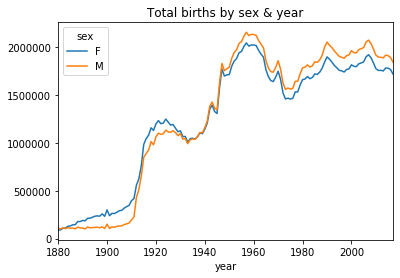

In [24]:
import matplotlib.pyplot as plt
total_births.plot(title='Total births by sex & year')
plt.show()

In [33]:
def add_prop(group):
    #Integer division floors
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

print(names.head(10))
groupby_names = names.groupby(['year','sex']).apply(add_prop)
print(groupby_names.head(10))

        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880
5   Margaret   F    1578  1880
6        Ida   F    1472  1880
7      Alice   F    1414  1880
8     Bertha   F    1320  1880
9      Sarah   F    1288  1880
        name sex  births  year      prop
0       Mary   F    7065  1880  0.077642
1       Anna   F    2604  1880  0.028617
2       Emma   F    2003  1880  0.022012
3  Elizabeth   F    1939  1880  0.021309
4     Minnie   F    1746  1880  0.019188
5   Margaret   F    1578  1880  0.017342
6        Ida   F    1472  1880  0.016177
7      Alice   F    1414  1880  0.015539
8     Bertha   F    1320  1880  0.014506
9      Sarah   F    1288  1880  0.014155


In [37]:
names = groupby_names
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1925008,Zykai,M,5,2017,0.000003
1925009,Zykeem,M,5,2017,0.000003
1925010,Zylin,M,5,2017,0.000003
1925011,Zylis,M,5,2017,0.000003


In [39]:
import numpy as np 
np.allclose(names.groupby(['year','sex']).prop.sum(),1 ) 

True

In [42]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2017 M   1911793     Camron   M     203  2017  0.000110
         1911794     Decker   M     203  2017  0.000110
         1911795     Tyrone   M     203  2017  0.000110
         1911796     Howard   M     202  2017  0.000110
         1911797       Jaxx   M     202  2017  0.000110

[275877 rows x 5 columns]